In [83]:
import pandas as pd

In [84]:
df_tc = pd.read_csv('./data/trash_collect.csv')

In [85]:
df_tc['recollect'].unique()

array(['T', 'F5', 'TH5', 'M', 'MTH', 'F', 'TF', 'TH', 'MF', 'W1A', 'W',
       nan, 'W5', 'T5'], dtype=object)

In [86]:
df_tc['trashday'].unique()

array(['T', 'F', 'TH', 'M', 'MTH', 'TF', 'MF', 'W', nan], dtype=object)

In [87]:
freq_dict = {'T':1,
 'F5':0.2, 
 'TH5':0.2,
 'M':1,
 'MTH':2, 
 'F':1, 
 'TF':2, 
 'TH':1, 
 'MF':2, 
#  'W1A':, 
 'W':1, 
 'W5':0.2, 
 'T5':0.2}

In [88]:
filenames = ['311 Cases 2010_2014 Unrestricted.csv', '311 Cases 2020_2024 Unrestricted.csv', '311 Cases 2015_2019 Unrestricted.csv']
df_311 = pd.concat([pd.read_csv('./data/'+filename) for filename in filenames])

/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_2561/1730263234.py:2: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df_311 = pd.concat([pd.read_csv('./data/'+filename) for filename in filenames])


In [89]:
df_311['REASON'].value_counts()[:10]

General Request                     374741
Sanitation                          353511
Street Cleaning                     329591
Enforcement & Abandoned Vehicles    293865
Highway Maintenance                 292042
Code Enforcement                    214126
Signs & Signals                     124304
Street Lights                       122886
Recycling                           102188
Trees                                91401
Name: REASON, dtype: int64

In [90]:
df_eav = df_311[df_311['REASON'] == 'Enforcement & Abandoned Vehicles']

df_sc = df_311[df_311['REASON'] == 'Street Cleaning']

df_san = df_311[df_311['REASON'] == 'Sanitation']

df_hm = df_311[df_311['REASON'] == 'Highway Maintenance']

df_ce = df_311[df_311['REASON'] == 'Code Enforcement']


In [100]:
ctid = df_311.groupby('CT_ID_10').first().index

In [101]:
close_rates = pd.DataFrame(index=ctid)
close_rates

""
CT_ID_10
2.501737e+10
2.502140e+10
2.502140e+10
2.502140e+10
2.502140e+10
...
2.502598e+10
2.502598e+10
2.502598e+10


In [110]:
df_hm

,Unnamed: 0,TYPE,CASE_ENQUIRY_ID,CLOSED_DT,LOCATION,OPEN_DT,REASON,SOURCE,SUBJECT,LocationID,...,PUBLIC,HOUSING,UNCIVILUSE,BIGBUILD,GRAFFITI,TRASH,PRIVATENEGLECT,PUBLICDENIG,PROBLEM,propid
31,679832.0,Highway Maintenance,101000102036,2010-01-09,"655-665 Beacon St, Boston, MA 02215",2010-01-01,Highway Maintenance,Constituent Call,Public Works Department,5.041480e+08,...,1,0,0,0,0,0,0,0,0,NaN
74,1455152.0,Request for Pothole Repair,101000102012,2010-01-08,"INTERSECTION of Dudley St & Dunmore St, Roxbur...",2010-01-01,Highway Maintenance,Constituent Call,Public Works Department,NaN,...,1,0,0,0,0,0,0,0,0,NaN
113,2500256.0,Utility Call-In,101000102017,2010-01-11,"1562 Tremont St, Mission Hill, MA 02120",2010-01-01,Highway Maintenance,Constituent Call,Public Works Department,1.000672e+09,...,0,0,0,0,0,0,0,0,0,NaN
114,2500451.0,Utility Call-In,101000101968,2010-01-11,"33 Bicknell St, Dorchester, MA 02121",2010-01-01,Highway Maintenance,Constituent Call,Public Works Department,1.402667e+09,...,0,0,0,0,0,0,0,0,0,NaN
115,2505063.0,Work Hours-Loud Noise Complaints,101000101980,2010-01-06,"11 Half Moon St, Dorchester, MA 02125",2010-01-01,Highway Maintenance,Constituent Call,Public Works Department,1.301040e+09,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419899,2076832.0,Sidewalk Repair (Make Safe),101003147930,2020-01-06,"18 Sanford St, Hyde Park, MA 02136",2019-12-31,Highway Maintenance,Constituent Call,Public Works Department,1.812469e+09,...,1,0,0,0,0,0,0,0,0,NaN
1419900,2079825.0,Sidewalk Repair (Make Safe),101003147507,2020-01-03,"175-235 Huntington Ave, Boston, MA 02115",2019-12-31,Highway Maintenance,City Worker App,Public Works Department,4.011500e+08,...,1,0,0,0,0,0,0,0,0,NaN
1419901,2079903.0,Sidewalk Repair (Make Safe),101003148074,NaN,"INTERSECTION of Pierce St & Fairmount Ave, Hyd...",2019-12-31,Highway Maintenance,Mobile Request,Public Works Department,NaN,...,1,0,0,0,0,0,0,0,0,NaN
1419949,2504243.0,Utility Casting Repair,101003147474,NaN,"567-569 Bennington St, East Boston, MA 02128",2019-12-31,Highway Maintenance,City Worker App,Public Works Department,1.008770e+08,...,1,0,0,0,0,0,0,0,0,NaN


In [125]:
import collections
import numpy as np
dfs = {
    'All':df_311, 
    'Enforcement & Abandoned Vehicles':df_eav,
    'Street Cleaning':df_sc,
    'Sanitation':df_san,                    
    'Highway Maintenance':df_hm,
    'Code Enforcement':df_ce}



for case_type, case_data in dfs.items():
    case_status_raw = case_data.groupby('CT_ID_10').aggregate(lambda x : x)['CLOSED_DT']

#     case_status_raw = case_status_raw.iloc[1:]
#     print(case_status_raw)

    d = {}
    for i, v in case_status_raw.items():
        
#         d[i] = collections.Counter(v)['Closed'] / (collections.Counter(v)['Closed'] + collections.Counter(v)['Open'])
#         print(i,collections.Counter(v))
#         print('i:', i)
#         print('v:', v)
#         print('type of v:', type(v))
        if type(v) != np.ndarray:
            v = [v]
        
        d[i] = len([dt for dt in v if dt is not np.nan]) / len(v)

    # print(data)
    ser = pd.Series(data=d, index=ctid)
    # normalization
    close_rates[case_type] = (ser-ser.mean())/ser.std()
    close_rates

/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_2561/3841984236.py:14: FutureWarning: ['Unnamed: 0', 'CASE_ENQUIRY_ID', 'LocationID', 'X', 'Y', 'TLID', 'BLK_ID_10', 'BG_ID_10', 'ObjectID', 'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI', 'TRASH', 'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  case_status_raw = case_data.groupby('CT_ID_10').aggregate(lambda x : x)['CLOSED_DT']
/var/folders/rm/gsdsmmyd1kg2sdz26j31kl800000gn/T/ipykernel_2561/3841984236.py:14: FutureWarning: ['Unnamed: 0', 'CASE_ENQUIRY_ID', 'LocationID', 'X', 'Y', 'TLID', 'BLK_ID_10', 'BG_ID_10', 'ObjectID', 'PUBLIC', 'HOUSING', 'UNCIVILUSE', 'BIGBUILD', 'GRAFFITI', 'TRASH', 'PRIVATENEGLECT', 'PUBLICDENIG', 'PROBLEM'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this wa

In [126]:
close_rates

,All,Enforcement & Abandoned Vehicles,Street Cleaning,Sanitation,Highway Maintenance,Code Enforcement
CT_ID_10,,,,,,
2.501737e+10,-0.856564,0.979859,0.518915,NaN,-1.917070,0.242400
2.502140e+10,-0.912487,NaN,-2.934626,NaN,-0.283507,NaN
2.502140e+10,-0.111870,0.979859,-0.571677,NaN,1.077795,0.242400
2.502140e+10,-0.655240,0.979859,0.518915,NaN,1.077795,NaN
2.502140e+10,0.373750,0.979859,0.518915,NaN,-5.184195,NaN
...,...,...,...,...,...,...
2.502598e+10,-2.792372,0.979859,-1.075027,NaN,0.183225,0.242400
2.502598e+10,-0.524189,0.979859,0.518915,NaN,0.508523,0.242400
2.502598e+10,-0.165640,0.432081,0.250441,0.46019,0.423557,0.058446


In [127]:
df_cl=pd.read_csv('./data/Climate_Ready_Boston_Social_Vulnerability.csv')
df_cl

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,LEP,POC2,MedIllnes,Name,Shape__Area,Shape__Length
0,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,1522,1755,2131.22,Mission Hill,6.661000e+05,6036.192907
1,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,2443,1749,2201.14,Fenway,2.506124e+05,2176.592171
2,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,462,447,1214.76,Back Bay,2.343579e+05,2542.043078
3,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,472,320,1014.20,Back Bay,5.496140e+05,3224.573044
4,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,931,1039,1181.78,Fenway,4.665852e+05,3143.610637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,25025081800,4024571.84,92.3915,2898,1388,329,891,286,1263,1549,2820,1054.40,Roxbury,6.843967e+05,4191.466959
176,177,25025081700,6819156.25,156.5463,3820,1599,715,1250,420,1552,1972,3746,1404.47,Roxbury,1.159715e+06,4789.149284
177,178,25025081500,3619583.13,83.0942,2134,905,340,430,197,809,1006,1957,804.02,Roxbury,6.155343e+05,4824.790469
178,179,25025081400,6678367.07,153.3142,3003,1462,268,314,283,791,1074,2318,1185.22,Jamaica Plain,1.135953e+06,6170.176383


In [128]:
df_cl['OlderAdult ratio']=(df_cl['OlderAdult'])/(df_cl['POP100_RE']+1)
df_cl['TotChild ratio']=(df_cl['TotChild'])/(df_cl['POP100_RE']+1)
df_cl['LEP ratio']=(df_cl['LEP'])/(df_cl['POP100_RE']+1)

df_cl['Low_to_No ratio']=(df_cl['Low_to_No'])/(df_cl['POP100_RE']+1)
df_cl['MedIllnes ratio']=(df_cl['MedIllnes'])/(df_cl['POP100_RE']+1)
df_cl['Disability ratio']=(df_cl['TotDis'])/(df_cl['POP100_RE']+1)

df_cl.index = df_cl['GEOID10']
df_cl

,FID,GEOID10,AREA_SQFT,AREA_ACRES,POP100_RE,HU100_RE,TotDis,TotChild,OlderAdult,Low_to_No,...,MedIllnes,Name,Shape__Area,Shape__Length,OlderAdult ratio,TotChild ratio,LEP ratio,Low_to_No ratio,MedIllnes ratio,Disability ratio
GEOID10,,,,,,,,,,,,,,,,,,,,,
25025010405,1,25025010405,3914567.54,89.8661,5522,994,470,60,331,1191,...,2131.22,Mission Hill,6.661000e+05,6036.192907,0.059931,0.010864,0.275575,0.215644,0.385881,0.085099
25025010404,2,25025010404,1472713.92,33.8089,5817,1862,299,77,56,2387,...,2201.14,Fenway,2.506124e+05,2176.592171,0.009625,0.013235,0.419904,0.410278,0.378333,0.051392
25025010801,3,25025010801,1376667.12,31.6039,2783,1899,84,281,390,72,...,1214.76,Back Bay,2.343579e+05,2542.043078,0.140086,0.100934,0.165948,0.025862,0.436336,0.030172
25025010702,4,25025010702,3228780.12,74.1226,2400,1643,45,86,285,187,...,1014.20,Back Bay,5.496140e+05,3224.573044,0.118701,0.035818,0.196585,0.077884,0.422407,0.018742
25025010204,5,25025010204,2741497.18,62.9361,3173,1283,131,13,36,895,...,1181.78,Fenway,4.665852e+05,3143.610637,0.011342,0.004096,0.293321,0.281979,0.372331,0.041273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25025081800,176,25025081800,4024571.84,92.3915,2898,1388,329,891,286,1263,...,1054.40,Roxbury,6.843967e+05,4191.466959,0.098655,0.307347,0.534322,0.435667,0.363712,0.113487
25025081700,177,25025081700,6819156.25,156.5463,3820,1599,715,1250,420,1552,...,1404.47,Roxbury,1.159715e+06,4789.149284,0.109919,0.327139,0.516095,0.406176,0.367566,0.187124
25025081500,178,25025081500,3619583.13,83.0942,2134,905,340,430,197,809,...,804.02,Roxbury,6.155343e+05,4824.790469,0.092272,0.201405,0.471194,0.378923,0.376590,0.159251


In [129]:
corrs = pd.DataFrame()
corrs.index = ['OlderAdult ratio', 'TotChild ratio', 'LEP ratio', 'Low_to_No ratio', 'MedIllnes ratio', 'Disability ratio']


Close rate for All cases
OlderAdult ratio: 0.1681297381622646
TotChild ratio: 0.0077212767765586715
LEP ratio: -0.12046192061726341
Low_to_No ratio: -0.08892387172134157
MedIllnes ratio: 0.2920939784031995
Disability ratio: -0.07597822858156975

Close rate for Enforcement & Abandoned Vehicles cases
OlderAdult ratio: -0.06811783135533006
TotChild ratio: -0.4726473477194058
LEP ratio: -0.138799001090145
Low_to_No ratio: -0.09285940737614079
MedIllnes ratio: 0.31799859183893847
Disability ratio: -0.3247191591531782

Close rate for Street Cleaning cases
OlderAdult ratio: 0.05834795873957889
TotChild ratio: 0.227310346241411
LEP ratio: 0.07723432428263113
Low_to_No ratio: 0.11425827300768045
MedIllnes ratio: -0.08633085998708136
Disability ratio: 0.11269413743019084

Close rate for Sanitation cases
OlderAdult ratio: -0.013722587805587702
TotChild ratio: -0.29586479636191837
LEP ratio: -0.27203831793203725
Low_to_No ratio: -0.31356554430137423
MedIllnes ratio: 0.21926489497889287
Disability

/Users/juanguang/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)



Close rate for Code Enforcement cases
OlderAdult ratio: -0.002410161894993486
TotChild ratio: 0.028548494224128113
LEP ratio: 0.020858112509735873
Low_to_No ratio: 0.07015032323751605
MedIllnes ratio: -0.005921027065098088
Disability ratio: 0.01930677551970306


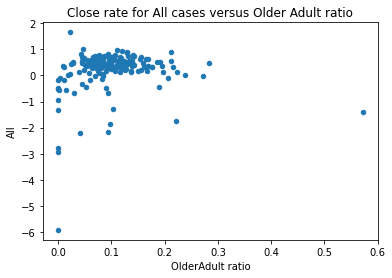

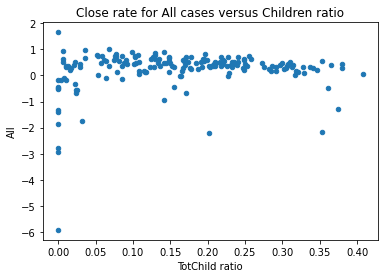

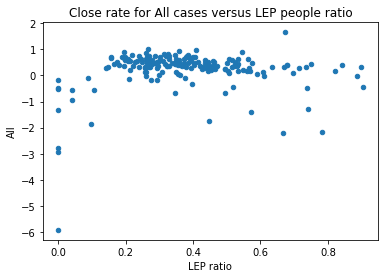

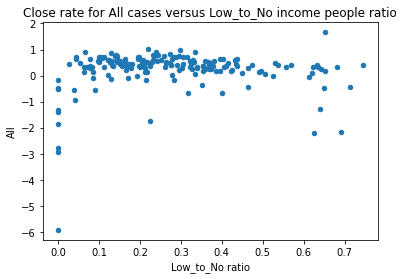

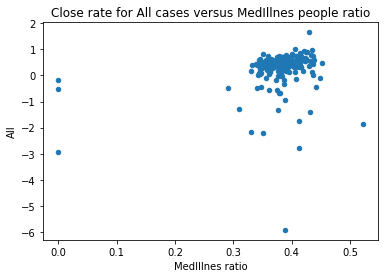

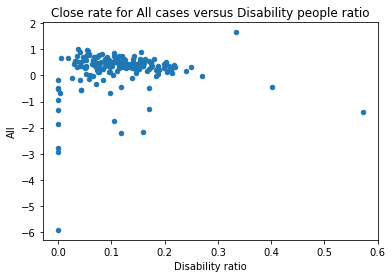

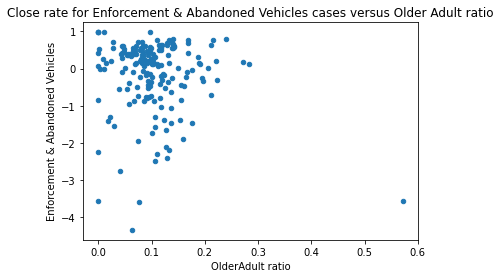

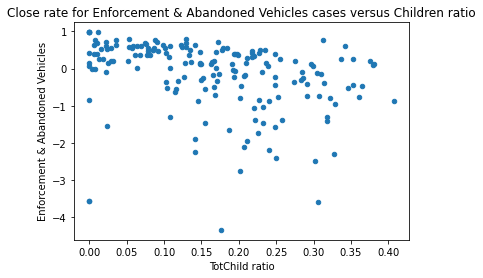

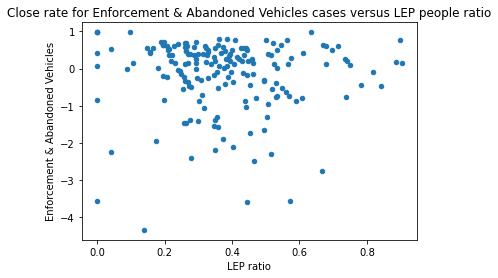

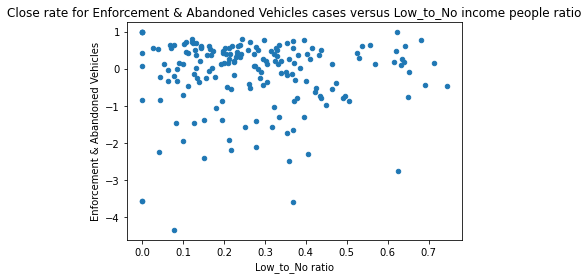

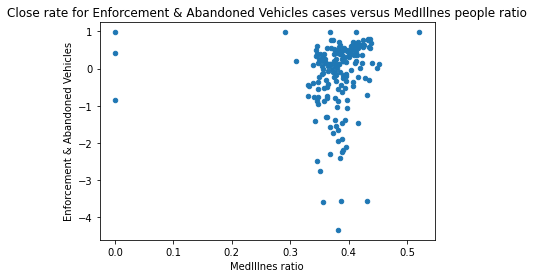

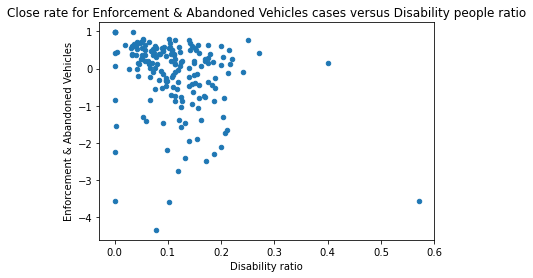

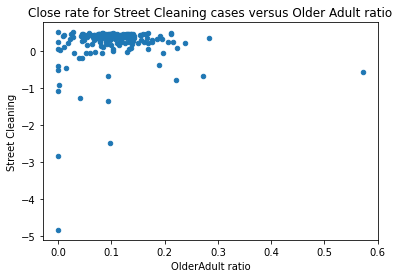

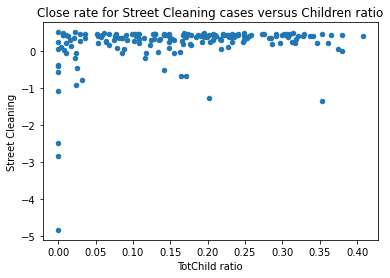

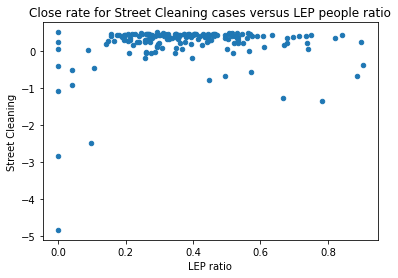

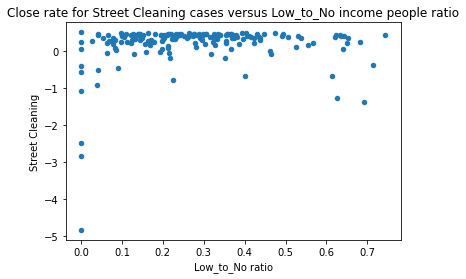

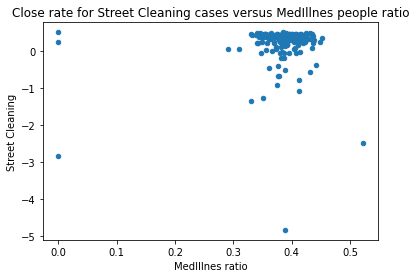

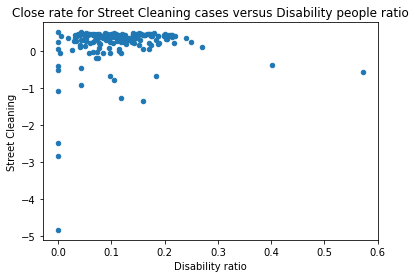

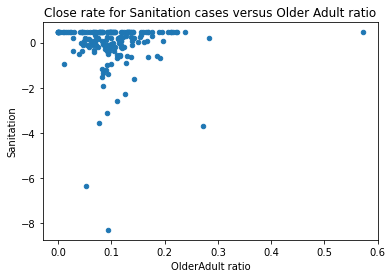

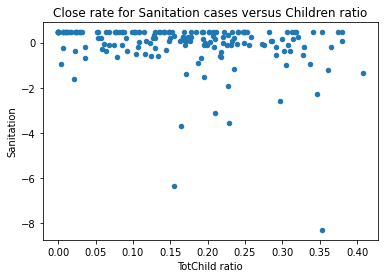

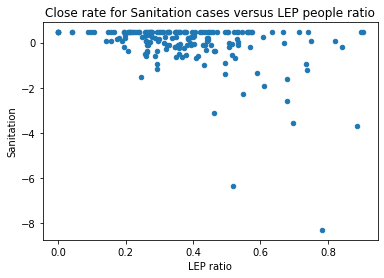

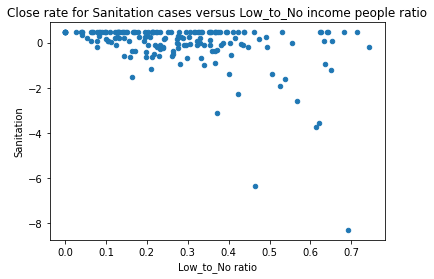

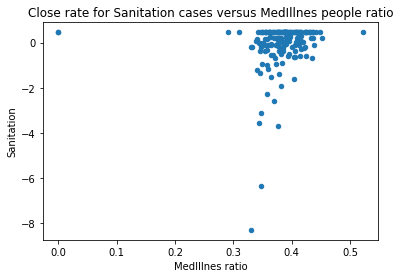

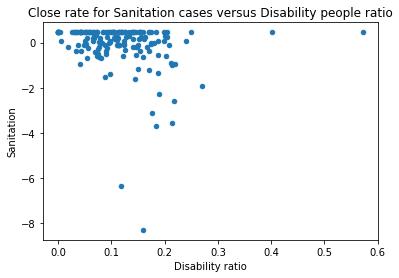

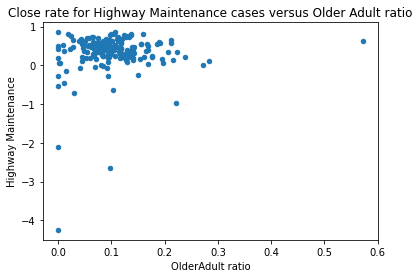

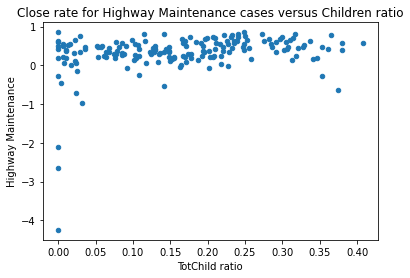

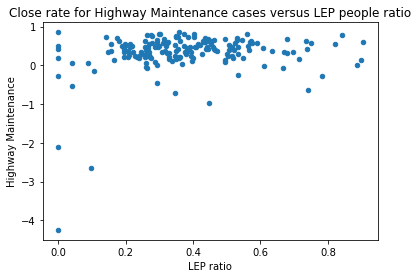

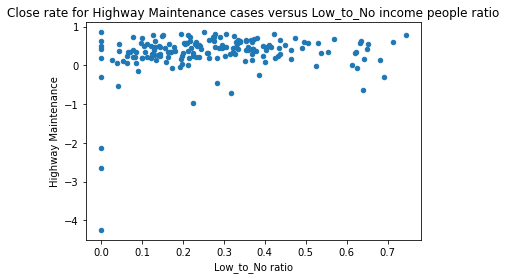

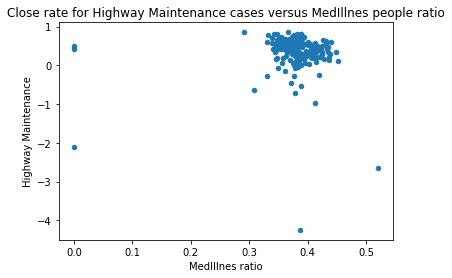

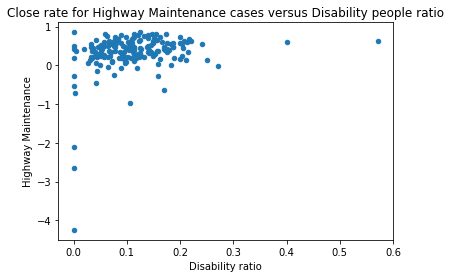

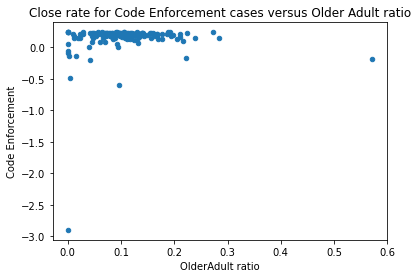

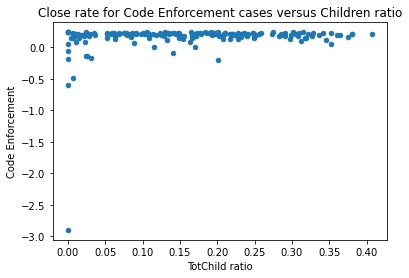

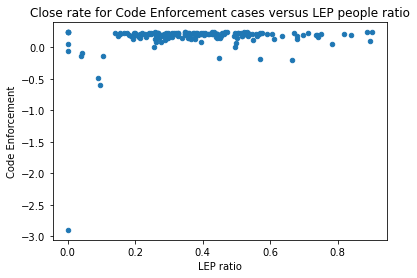

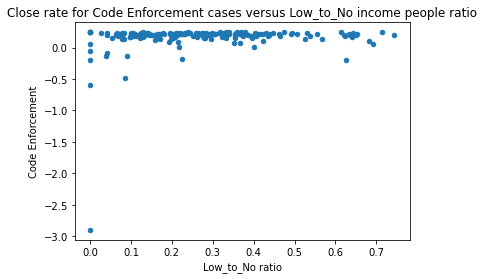

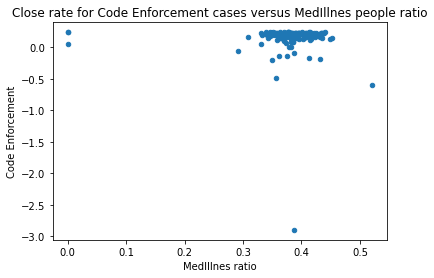

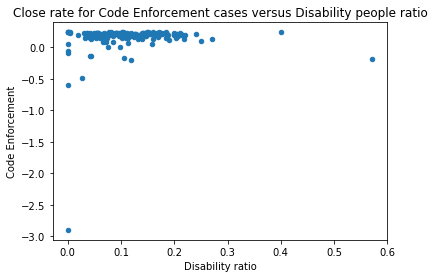

In [130]:
case_types = ['All','Enforcement & Abandoned Vehicles','Street Cleaning','Sanitation','Highway Maintenance','Code Enforcement']
for case_type in case_types:
    print('\nClose rate for '+case_type+' cases')

    print('OlderAdult ratio:', df_cl['OlderAdult ratio'].corr(close_rates[case_type], method='spearman'))
    print('TotChild ratio:', df_cl['TotChild ratio'].corr(close_rates[case_type], method='spearman'))
    print('LEP ratio:', df_cl['LEP ratio'].corr(close_rates[case_type], method='spearman'))
    print('Low_to_No ratio:', df_cl['Low_to_No ratio'].corr(close_rates[case_type], method='spearman'))
    print('MedIllnes ratio:', df_cl['MedIllnes ratio'].corr(close_rates[case_type], method='spearman'))
    print('Disability ratio:', df_cl['Disability ratio'].corr(close_rates[case_type], method='spearman'))

    d={
        'OlderAdult ratio': df_cl['OlderAdult ratio'].corr(close_rates[case_type], method='spearman'),
    'TotChild ratio': df_cl['TotChild ratio'].corr(close_rates[case_type], method='spearman'),
    'LEP ratio': df_cl['LEP ratio'].corr(close_rates[case_type], method='spearman'),
    'Low_to_No ratio': df_cl['Low_to_No ratio'].corr(close_rates[case_type], method='spearman'),  
    'MedIllnes ratio': df_cl['MedIllnes ratio'].corr(close_rates[case_type], method='spearman'),
    'Disability ratio': df_cl['Disability ratio'].corr(close_rates[case_type], method='spearman'),   
    }

    corrs[case_type] = pd.Series(data=d, index=corrs.index)
    # corrs

    df=pd.concat([df_cl['OlderAdult ratio'],df_cl['TotChild ratio'],df_cl['LEP ratio'],df_cl['Low_to_No ratio'],df_cl['MedIllnes ratio'],df_cl['Disability ratio'],close_rates[case_type]],axis=1)
    df.plot(
        kind='scatter',
        x='OlderAdult ratio',
        y=case_type,
        title='Close rate for '+case_type+' cases versus Older Adult ratio'
    )
    df.plot(
        kind='scatter',
        x='TotChild ratio',
        y=case_type,
        title='Close rate for '+case_type+' cases versus Children ratio'
    )
    df.plot(
        kind='scatter',
        x='LEP ratio',
        y=case_type,
        title='Close rate for '+case_type+' cases versus LEP people ratio'
    )
    df.plot(
        kind='scatter',
        x='Low_to_No ratio',
        y=case_type,
        title='Close rate for '+case_type+' cases versus Low_to_No income people ratio'
    )

    df.plot(
        kind='scatter',
        x='MedIllnes ratio',
        y=case_type,
        title='Close rate for '+case_type+' cases versus MedIllnes people ratio'
    )

    df.plot(
        kind='scatter',
        x='Disability ratio',
        y=case_type,
        title='Close rate for '+case_type+' cases versus Disability people ratio'
    )

In [131]:
corrs

,All,Enforcement & Abandoned Vehicles,Street Cleaning,Sanitation,Highway Maintenance,Code Enforcement
OlderAdult ratio,0.168130,-0.068118,0.058348,-0.013723,-0.016511,-0.002410
TotChild ratio,0.007721,-0.472647,0.227310,-0.295865,0.296077,0.028548
LEP ratio,-0.120462,-0.138799,0.077234,-0.272038,0.143849,0.020858
Low_to_No ratio,-0.088924,-0.092859,0.114258,-0.313566,0.165102,0.070150
MedIllnes ratio,0.292094,0.317999,-0.086331,0.219265,-0.230224,-0.005921
Disability ratio,-0.075978,-0.324719,0.112694,-0.283035,0.227647,0.019307
